In [95]:
import os
import glob
import wave
import pydub
import librosa
import numpy as np
import contextlib

In [84]:
paths = ['BD15C', 'BD15L', 'BD6B', 'BD6A']

In [85]:
def make_chunks(path, fp, chunk_length_ms):
    output_path = path + '_chunk'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    myaudio = pydub.AudioSegment.from_file(fp, 'wav')
    chunks = pydub.utils.make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec
    
    for i, chunk in enumerate(chunks):
        chunk_name = "./{0}/{1}_chunk{2}.wav".format(output_path, os.path.splitext(os.path.basename(fp))[0], i)
        print "exporting", chunk_name
        chunk.export(chunk_name, format="wav")

In [111]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)


def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 60, frames = 41, label = 1):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    for l, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            sound_clip,s = librosa.load(fn)
            for (start,end) in windows(sound_clip,window_size):
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                    logspec = librosa.logamplitude(melspec)
                    logspec = logspec.T.flatten()[:, np.newaxis].T
                    log_specgrams.append(logspec)
                    labels.append(l)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), np.array(labels)
# def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 60, frames = 41):
#     window_size = 512 * (frames - 1)
#     log_specgrams = []
#     for l, sub_dir in enumerate(sub_dirs):
#         for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
#             sound_clip,s = librosa.load(fn)
#             for (start,end) in windows(sound_clip,window_size):
#                 if(len(sound_clip[start:end]) == window_size):
#                     signal = sound_clip[start:end]
#                     melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
#                     logspec = librosa.logamplitude(melspec)
#                     logspec = logspec.T.flatten()[:, np.newaxis].T
#                     log_specgrams.append(logspec)
            
#     log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
#     features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
#     for i in range(len(features)):
#         features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
#     return np.array(features)

In [86]:
for path in paths:
    files = [path + "/" + s for s in os.listdir(path)]
    for fp in files:
        make_chunks(path, fp, 1000)

exporting ./BD15C_chunk/8500701A_chunk0.wav
exporting ./BD15C_chunk/8500701A_chunk1.wav
exporting ./BD15C_chunk/7200703B_chunk0.wav
exporting ./BD15C_chunk/7500305Y_chunk0.wav
exporting ./BD15C_chunk/75003011_chunk0.wav
exporting ./BD15C_chunk/75003011_chunk1.wav
exporting ./BD15C_chunk/7500301P_chunk0.wav
exporting ./BD15C_chunk/7500301P_chunk1.wav
exporting ./BD15C_chunk/7500301P_chunk2.wav
exporting ./BD15C_chunk/7500301P_chunk3.wav
exporting ./BD15C_chunk/58011012_chunk0.wav
exporting ./BD15C_chunk/58011012_chunk1.wav
exporting ./BD15C_chunk/58011012_chunk2.wav
exporting ./BD15C_chunk/5801100C_chunk0.wav
exporting ./BD15C_chunk/5801100C_chunk1.wav
exporting ./BD15C_chunk/7500300M_chunk0.wav
exporting ./BD15C_chunk/7500300M_chunk1.wav
exporting ./BD15C_chunk/58011004_chunk0.wav
exporting ./BD15C_chunk/5801100Z_chunk0.wav
exporting ./BD15C_chunk/5801100R_chunk0.wav
exporting ./BD15C_chunk/75003015_chunk0.wav
exporting ./BD15C_chunk/75003015_chunk1.wav
exporting ./BD15C_chunk/5801101O

In [112]:
parent_dir = '.'
# sub_dirs= ['BD15C_chunk', 'BD15L_chunk', 'BD6B_chunk', 'BD6A_chunk']
# features = extract_features(parent_dir,sub_dirs,frames=44)
features = extract_features(parent_dir,paths,frames=44)

In [89]:
X,sr = librosa.load('./BD15C_chunk/58011001_chunk0.wav')
mfccs = librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40)

In [90]:
mfccs.shape

(40, 44)

In [91]:
sr

22050

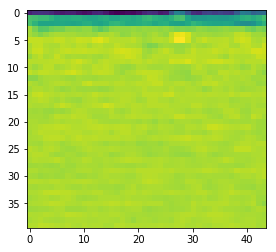

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show(plt.imshow(mfccs))

In [44]:
path = './BD15C_chunk/'

In [56]:
for fp in listdir(path):
    if os.path.isfile(path + fp):
        with contextlib.closing(wave.open(path + fp,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            print(fp, duration)

('58011001_chunk0.wav', 1.0)
('58011001_chunk1.wav', 0.35299019607843135)
('58011001_chunk2.wav', 1.0)
('7500300H_chunk0.wav', 1.0)
('58011001_chunk3.wav', 0.291996699669967)
('7500300H_chunk1.wav', 0.35299019607843135)


In [97]:
glob.glob(os.path.join(parent_dir, 'BD15C_chunk', '*.wav'))

['./BD15C_chunk/5801100W_chunk1.wav',
 './BD15C_chunk/7500300P_chunk0.wav',
 './BD15C_chunk/5801101O_chunk19.wav',
 './BD15C_chunk/58011008_chunk1.wav',
 './BD15C_chunk/5801100O_chunk2.wav',
 './BD15C_chunk/75003015_chunk0.wav',
 './BD15C_chunk/7500300V_chunk0.wav',
 './BD15C_chunk/7500300T_chunk0.wav',
 './BD15C_chunk/5801101O_chunk17.wav',
 './BD15C_chunk/8500701A_chunk1.wav',
 './BD15C_chunk/58011004_chunk0.wav',
 './BD15C_chunk/58011011_chunk0.wav',
 './BD15C_chunk/5801101M_chunk0.wav',
 './BD15C_chunk/5801100G_chunk0.wav',
 './BD15C_chunk/8500701K_chunk0.wav',
 './BD15C_chunk/8500701H_chunk1.wav',
 './BD15C_chunk/7500301P_chunk0.wav',
 './BD15C_chunk/5801100R_chunk0.wav',
 './BD15C_chunk/58011009_chunk0.wav',
 './BD15C_chunk/5801101O_chunk7.wav',
 './BD15C_chunk/75003061_chunk1.wav',
 './BD15C_chunk/5801100U_chunk1.wav',
 './BD15C_chunk/5801100I_chunk0.wav',
 './BD15C_chunk/5801100V_chunk2.wav',
 './BD15C_chunk/8500701I_chunk2.wav',
 './BD15C_chunk/75003019_chunk0.wav',
 './BD15C_

In [114]:
features[0].shape

(1128, 60, 44, 2)

In [115]:
features[1].shape

(1128,)

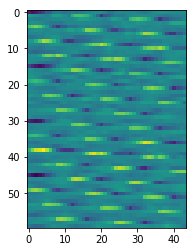

In [119]:
plt.show(plt.imshow(features[0][1000,:,:,1]))